<a href="https://colab.research.google.com/github/AKSHITHA-CHILUKA/Akshitha-GlucoSense-Infy-Nov24/blob/main/Diabities_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/diabetes_data.csv", delimiter=";")


In [23]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [24]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

The info() output provides information about data types, non-null counts, and memory usage, helping identify potential missing values and assess the dataset’s structure.

In [25]:
print(df.describe())


              age    polyuria  polydipsia  sudden_weight_loss    weakness  \
count  520.000000  520.000000  520.000000          520.000000  520.000000   
mean    48.028846    0.496154    0.448077            0.417308    0.586538   
std     12.151466    0.500467    0.497776            0.493589    0.492928   
min     16.000000    0.000000    0.000000            0.000000    0.000000   
25%     39.000000    0.000000    0.000000            0.000000    0.000000   
50%     47.500000    0.000000    0.000000            0.000000    1.000000   
75%     57.000000    1.000000    1.000000            1.000000    1.000000   
max     90.000000    1.000000    1.000000            1.000000    1.000000   

       polyphagia  genital_thrush  visual_blurring     itching  irritability  \
count  520.000000      520.000000       520.000000  520.000000    520.000000   
mean     0.455769        0.223077         0.448077    0.486538      0.242308   
std      0.498519        0.416710         0.497776    0.500300    

describe() gives summary statistics for numerical features like age, showing mean, min, max, and quartiles, which can help you detect outliers.

In [26]:
print(df['class'].value_counts())

class
1    320
0    200
Name: count, dtype: int64


value_counts() on the target variable (class) shows the balance between classes, providing insights into whether the dataset might be imbalanced.

**Univariate Analysis: Gender Distribution**

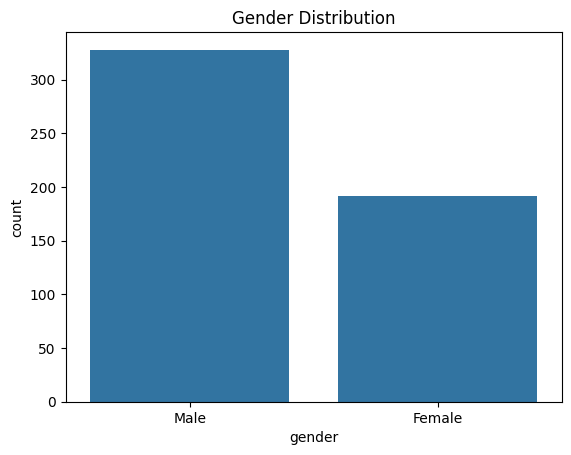

In [27]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


This bar plot shows the count of each gender in the dataset. Understanding gender distribution helps assess whether there’s a potential gender bias or imbalance, which could impact results, especially in healthcare data.

**Univariate Analysis: Age Distribution**

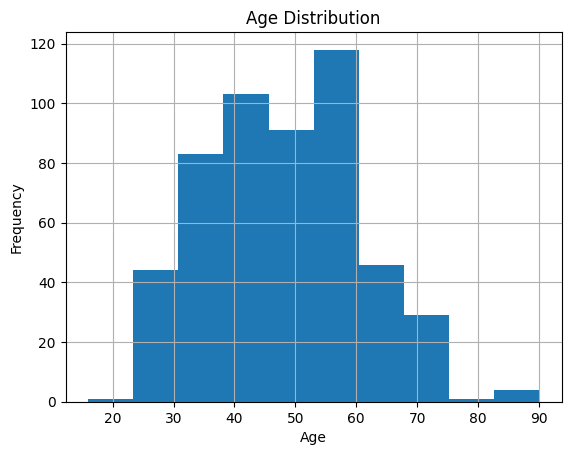

In [28]:
df['age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


The histogram illustrates the distribution of ages in the dataset. This gives a sense of the dataset’s age range and helps identify if it’s skewed towards a particular age group. Age distributions are important as certain age groups may be more prone to certain health conditions.

**Bivariate Analysis: Age vs. Class**


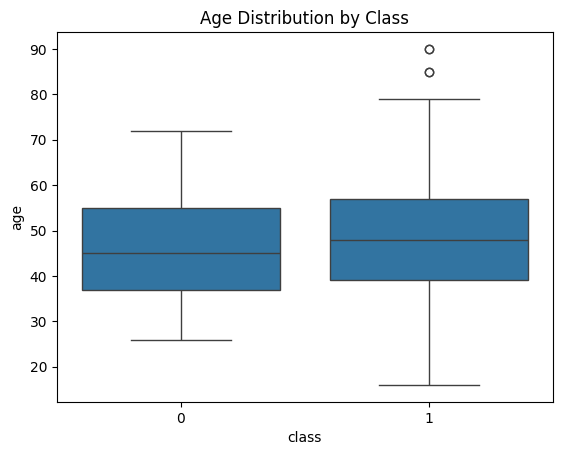

In [29]:
sns.boxplot(x='class', y='age', data=df)
plt.title('Age Distribution by Class')
plt.show()


This box plot shows the distribution of age for each class. If there’s a significant difference between the age distributions across classes, age might be a key predictor. For example, if one class tends to have a higher median age, it may indicate a correlation between age and the target variable.

**Bivariate Analysis: Polyuria vs. Class**

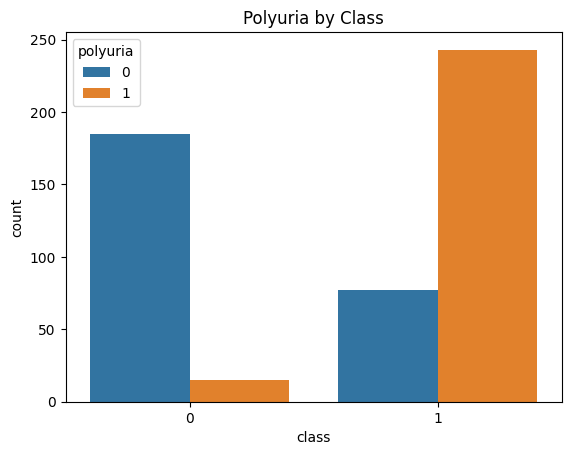

In [30]:
sns.countplot(x='class', hue='polyuria', data=df)
plt.title('Polyuria by Class')
plt.show()


The count plot shows the distribution of the polyuria feature for each class. If certain symptoms, like polyuria, are more prevalent in one class, this feature could be a strong indicator for prediction. Examining such relationships between symptoms and class can reveal critical patterns in the dataset.

**Multivariate Analysis: Pair Plot**

The pair plot allows you to visually inspect the relationships between pairs of features, with points colored by class. It helps identify separability between classes based on feature combinations, providing insights into the data's linear or nonlinear relationships.


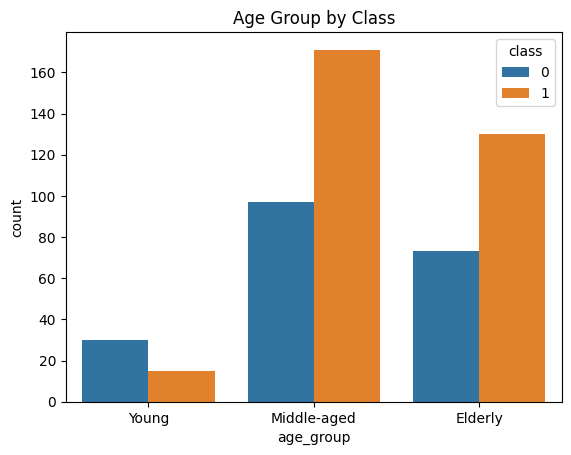

In [31]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 80], labels=['Young', 'Middle-aged', 'Elderly'])
sns.countplot(x='age_group', hue='class', data=df)
plt.title('Age Group by Class')
plt.show()


In [32]:
X = pd.get_dummies(df.drop('class', axis=1))
y = df['class']


In [33]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
X = df.drop('class', axis=1)
y = df['class']


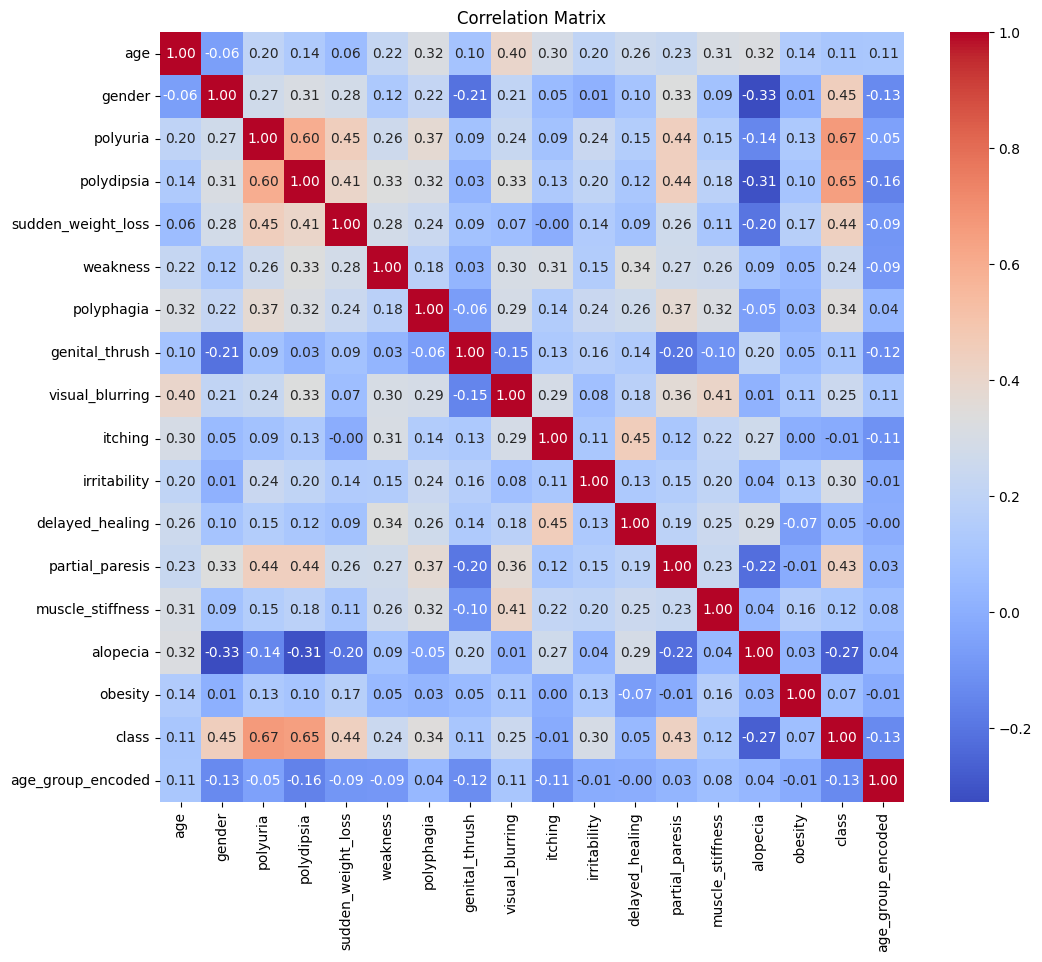

In [34]:

df['age_group_encoded'] = pd.factorize(df['age_group'])[0]
correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

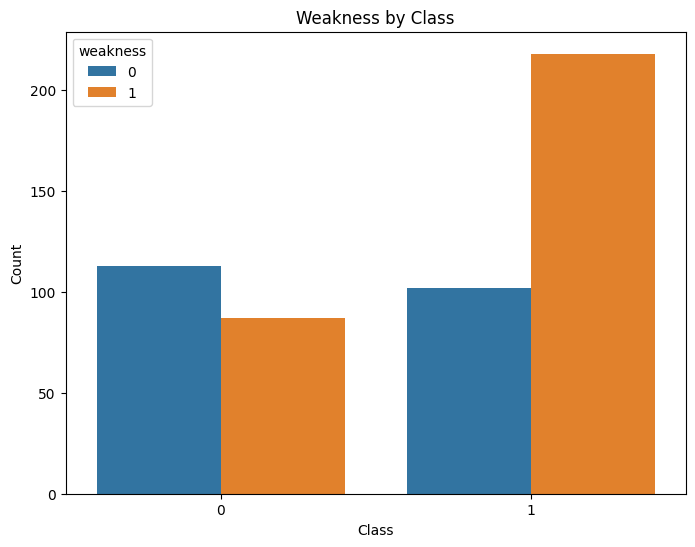

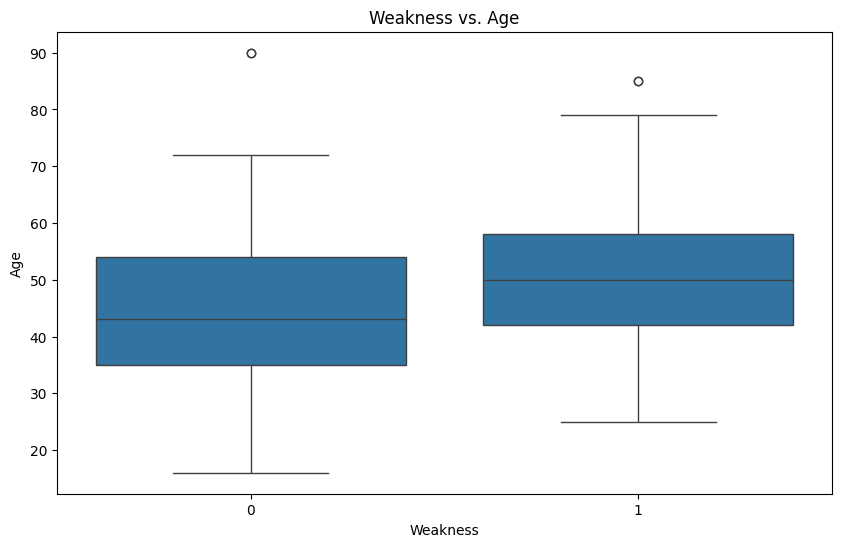

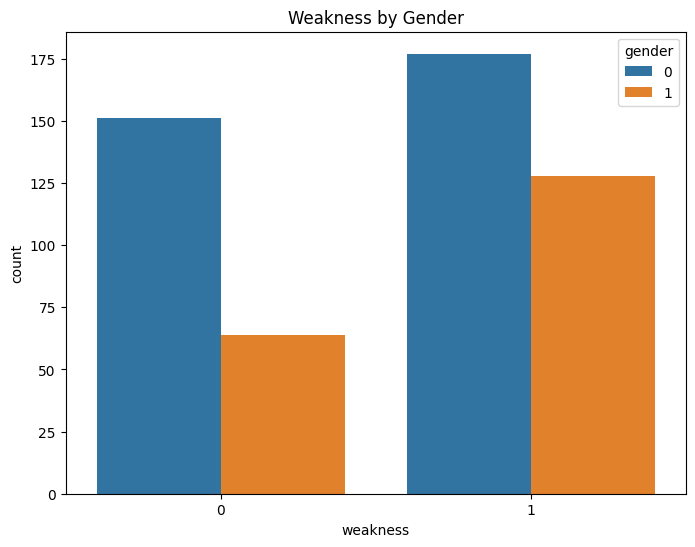

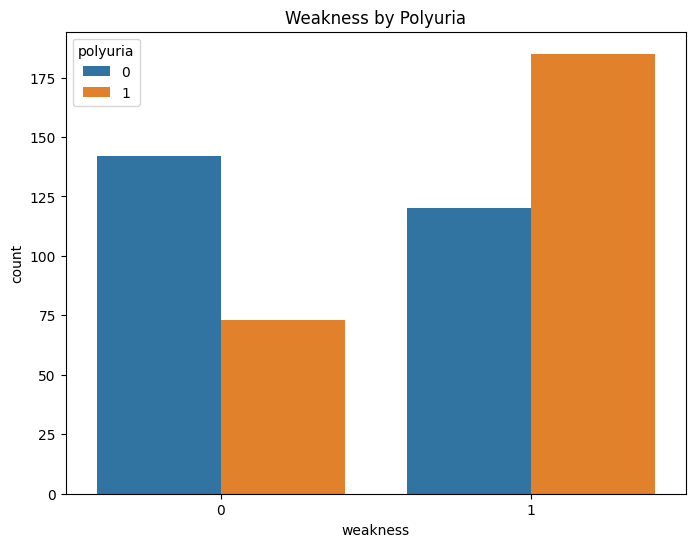

In [35]:

plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='weakness', data=df)
plt.title('Weakness by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='weakness', y='age', data=df) # or sns.violinplot
plt.title('Weakness vs. Age')
plt.xlabel('Weakness')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='weakness', hue='gender', data=df)
plt.title('Weakness by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='weakness', hue='polyuria', data=df)
plt.title('Weakness by Polyuria')
plt.show()



In [36]:
df[df['class'] == 'Positive']

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,age_group,age_group_encoded


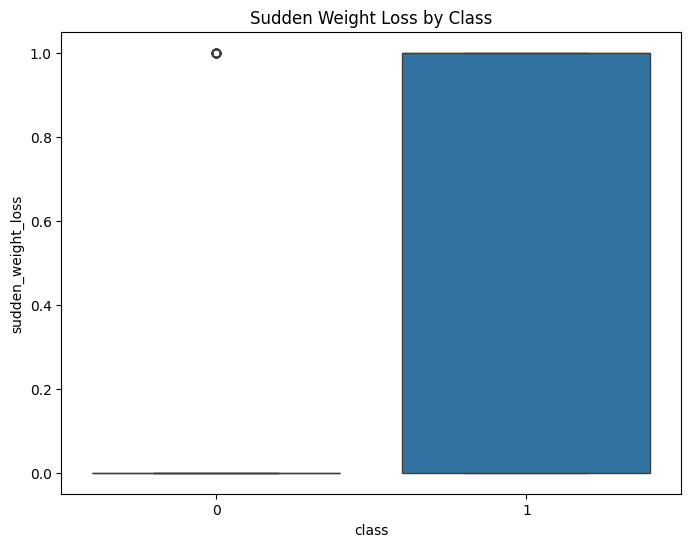

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='sudden_weight_loss', data=df)
plt.title('Sudden Weight Loss by Class')
plt.show()

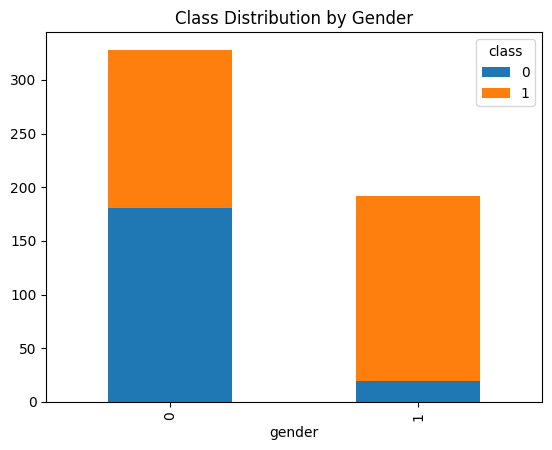

In [38]:
pd.crosstab(df['gender'], df['class']).plot(kind='bar', stacked=True)
plt.title('Class Distribution by Gender')
plt.show()


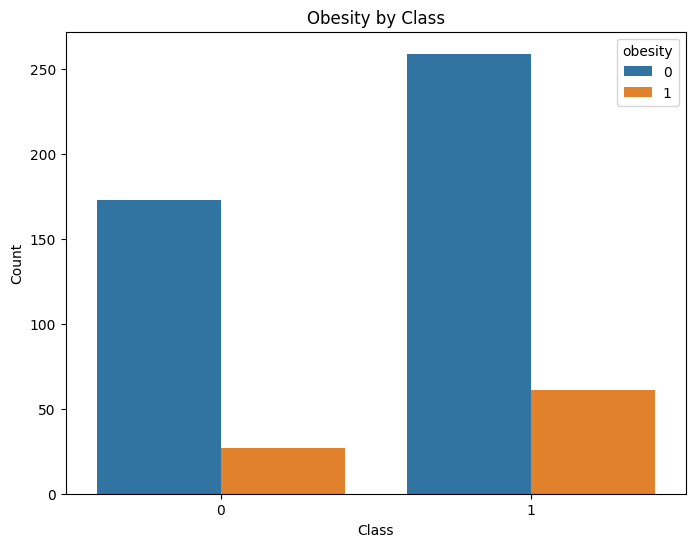

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='obesity', data=df)
plt.title('Obesity by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

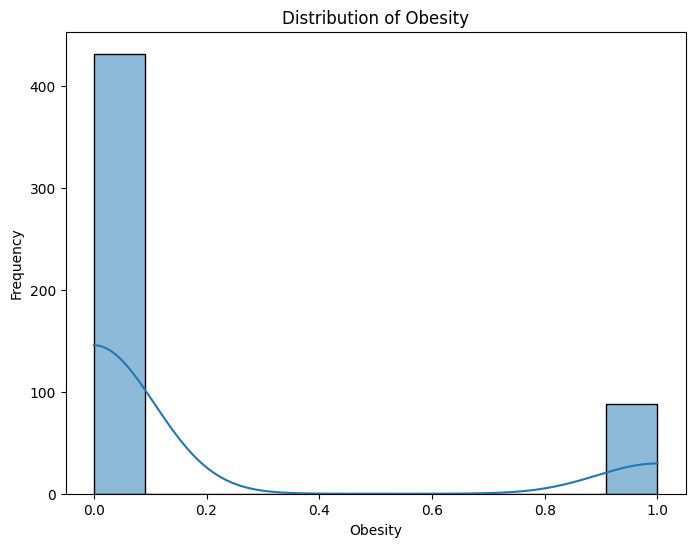

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(df['obesity'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Obesity')
plt.xlabel('Obesity')
plt.ylabel('Frequency')
plt.show()

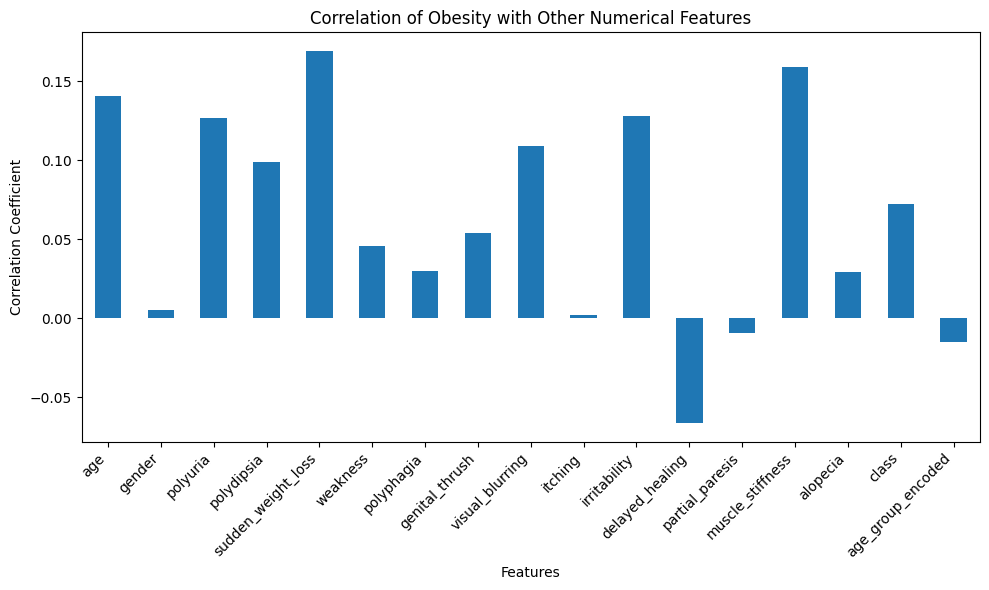

In [41]:
numerical_features = df.select_dtypes(include=np.number).columns
obesity_correlations = df[numerical_features].corr()['obesity'].drop('obesity')

plt.figure(figsize=(10, 6))
obesity_correlations.plot(kind='bar')
plt.title('Correlation of Obesity with Other Numerical Features')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

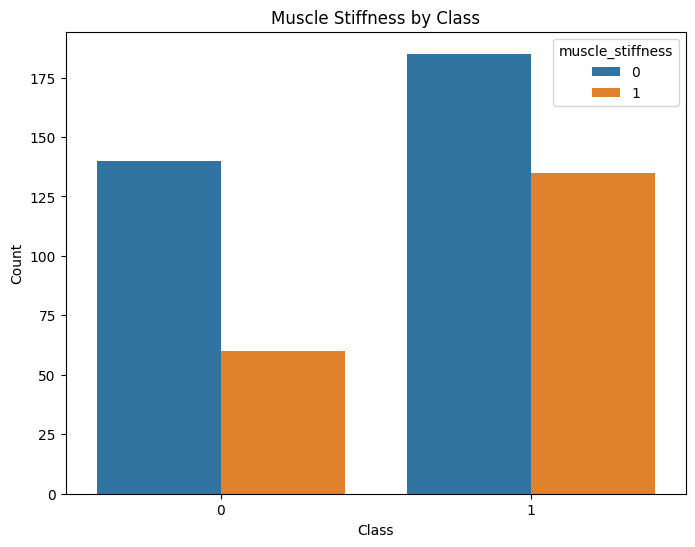

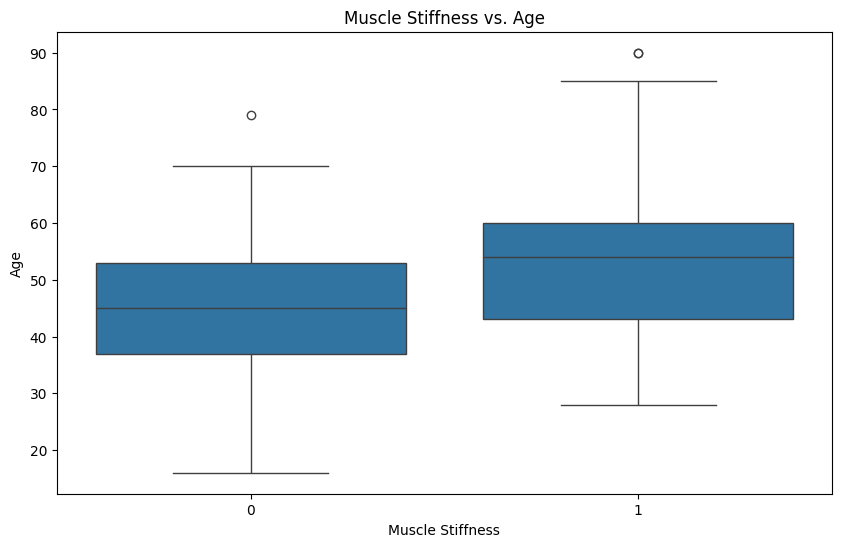

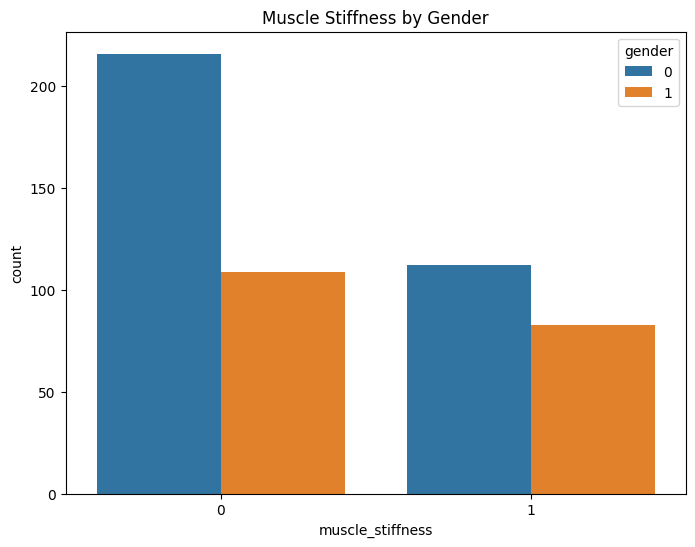

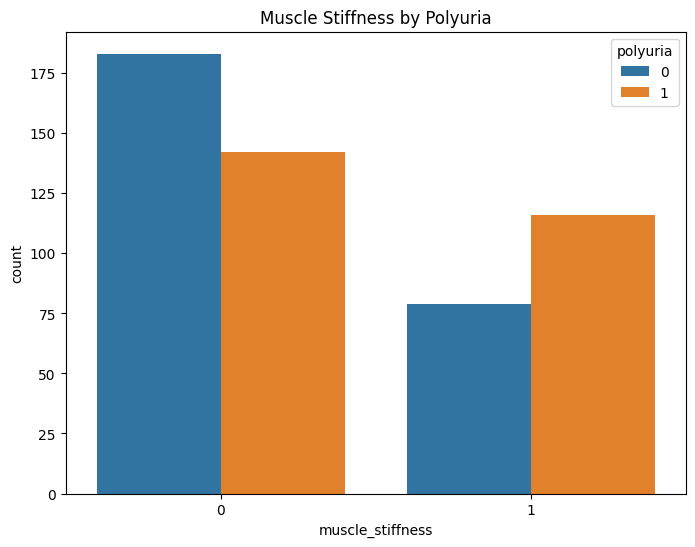

In [42]:


plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='muscle_stiffness', data=df)
plt.title('Muscle Stiffness by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='muscle_stiffness', y='age', data=df) # or sns.violinplot
plt.title('Muscle Stiffness vs. Age')
plt.xlabel('Muscle Stiffness')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='muscle_stiffness', hue='gender', data=df)
plt.title('Muscle Stiffness by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='muscle_stiffness', hue='polyuria', data=df)
plt.title('Muscle Stiffness by Polyuria')
plt.show()